In [1]:
pip install --upgrade diffusers transformers scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install accelerate

Note: you may need to restart the kernel to use updated packages.


In [3]:
with open('token.txt') as ifp:
    access_token = ifp.readline()
    print('Read a token of length {}'.format( len(access_token) ))

Read a token of length 37


In [4]:
import torch
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler

model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"

/opt/conda/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, revision="fp16", use_auth_token=access_token, device_map="auto")
pipe = pipe.to(device)

Fetching 16 files: 100%|██████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 7896.09it/s]
ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [13]:
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16, revision="fp16")
# pipe = pipe.to("cuda")

Fetching 16 files: 100%|██████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 6979.60it/s]
ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


In [3]:
prompt = "a photo of an astronaut riding a horse"
image = pipe(prompt).images[0]

# image.save("astronaut_rides_horse.png")

RuntimeError: "LayerNormKernelImpl" not implemented for 'Half'

In [8]:
image.save("astronaut_rides_horse.png")

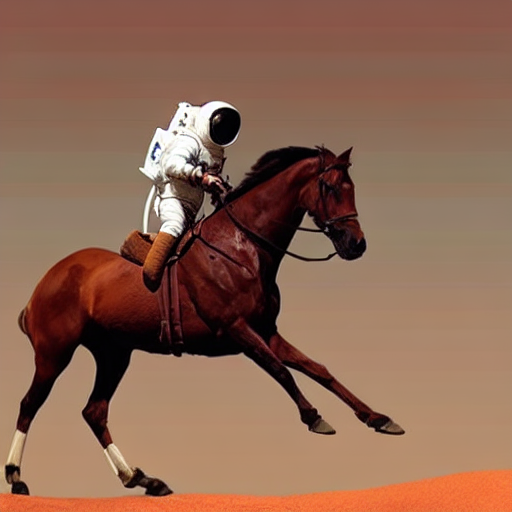

In [9]:
from PIL import Image

image = Image.open('astronaut_rides_horse.png')
image.show()